In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.model_selection import train_test_split
#import tensorflow as tf
from sklearn.metrics import roc_auc_score
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn import preprocessing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from joblib import Parallel, delayed
import joblib

In [3]:
df = pd.read_csv("C__Users_Bob_Desktop_my_data.csv")
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
257669,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
257670,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
257671,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [4]:
from sklearn.utils import shuffle
df = shuffle(df,random_state=50)

In [5]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder1 = preprocessing.LabelEncoder()
df['proto']= label_encoder1.fit_transform(df['proto'])
  
df['proto'].unique()
label_encoder2 = preprocessing.LabelEncoder()
df['attack_cat']= label_encoder2.fit_transform(df['attack_cat'])
  
df['attack_cat'].unique()

label_encoder3 = preprocessing.LabelEncoder()
df['service']= label_encoder3.fit_transform(df['service'])
  
df['service'].unique()
label_encoder4 = preprocessing.LabelEncoder()
df['state']= label_encoder4.fit_transform(df['state'])
  
df['state'].unique()

array([ 2,  4,  5,  7,  9,  8,  3,  0,  6, 10,  1])

In [6]:
y=df['label']
#y1=df.iloc[:,-1]
x_k=df.drop(['label','attack_cat','id','dwin','sloss','stcpb','dtcpb','swin','response_body_len','ct_flw_http_mthd','trans_depth','is_sm_ips_ports','is_ftp_login','ct_ftp_cmd'],axis=1)
#y= df['attack_cat']

In [7]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_k_1= sc.fit_transform(x_k)

x = pd.DataFrame(x_k_1)

x.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,2.881667e-05,0.901515,0.000000,0.2,0.000282,0.000363,0.000035,0.000021,0.004049,0.121569,...,0.071622,0.050667,0.161290,0.000000,0.034483,0.000000,0.000000,0.031250,0.067797,0.081967
1,3.751644e-02,0.856061,0.750000,0.4,0.008361,0.002723,0.006857,0.000153,0.000053,0.243137,...,0.722973,0.050000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3.369212e-02,0.856061,0.000000,0.2,0.000470,0.000182,0.000069,0.000006,0.000003,0.243137,...,0.097973,0.028667,0.016129,0.500000,0.034483,0.000000,0.000000,0.000000,0.000000,0.032787
3,5.000001e-08,0.901515,0.166667,0.5,0.000094,0.000000,0.000006,0.000000,0.333333,0.996078,...,0.022297,0.000000,0.467742,0.333333,0.068966,0.068966,0.088889,0.453125,0.084746,0.475410
4,2.057985e-02,0.856061,0.416667,0.4,0.001221,0.001634,0.000116,0.000694,0.000025,0.121569,...,0.064865,0.376667,0.016129,0.000000,0.103448,0.000000,0.000000,0.000000,0.033898,0.016393


In [8]:
y.head()

200566    0
226191    1
245537    0
198365    1
200520    0
Name: label, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=946,stratify=y)

Train Model GaussianNB

In [11]:
from sklearn.naive_bayes import GaussianNB
Gnb = GaussianNB(var_smoothing=5e-08)

In [12]:
Gnb.fit(X_train,y_train)

GaussianNB(var_smoothing=5e-08)

In [13]:
joblib.dump(Gnb, 'UNSW_GaussianNaiveBayes_with_HyperParameter_Binary.pkl')

['UNSW_GaussianNaiveBayes_with_HyperParameter_Binary.pkl']

In [14]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(min_samples_split=4, n_estimators=95)

In [15]:
RF.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=4, n_estimators=95)

In [16]:
joblib.dump(RF, 'UNSW_RandomForestClassifier_With_HyperParameter_Binary.pkl')

['UNSW_RandomForestClassifier_With_HyperParameter_Binary.pkl']

Train Model with Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression(C=10, random_state=0, solver='newton-cg', tol=0.1)

In [18]:
Lr.fit(X_train,y_train)

LogisticRegression(C=10, random_state=0, solver='newton-cg', tol=0.1)

In [19]:
joblib.dump(Lr, 'UNSW_LogisticRegression_With_HyperParameter_binary.pkl')

['UNSW_LogisticRegression_With_HyperParameter_binary.pkl']

Train Model with KNN Classifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(p=1)

In [21]:
Knn.fit(X_train,y_train)

KNeighborsClassifier(p=1)

In [22]:
joblib.dump(Knn, 'UNSW_KNeighborsClassifier_With_HyperParameter_binary.pkl')

['UNSW_KNeighborsClassifier_With_HyperParameter_binary.pkl']

In [62]:
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier(max_depth=25, min_samples_split=10)

In [63]:
Dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=25, min_samples_split=10)

In [64]:
joblib.dump(Dt, 'UNSW_DecisionTreeClassifier_With_HyperParameter_binary.pkl')

['UNSW_DecisionTreeClassifier_With_HyperParameter_binary.pkl']

Train Model with Decision Tree

Train with XGB classifer

In [12]:
from xgboost import XGBClassifier
import xgboost as xgb

In [14]:
Xg = XGBClassifier(alpha=4, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False, eta=0.3,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
               monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto')

In [16]:
Xg.fit(X_train,y_train)

XGBClassifier(alpha=4, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False, eta=0.3,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [17]:
joblib.dump(Xg, 'UNSW_XGBclassifer_With_HyperParameter_binary.pkl')

['UNSW_XGBclassifer_With_HyperParameter_binary.pkl']

Adaboost Classifier

In [23]:
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier(learning_rate=1.02, n_estimators=20, random_state=1)

In [24]:
Ada.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=1.02, n_estimators=20, random_state=1)

In [25]:
joblib.dump(Ada, 'UNSW_AdaBoostClassifier_With_HyperParameter_binary.pkl')

['UNSW_AdaBoostClassifier_With_HyperParameter_binary.pkl']

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
gradboost=GradientBoostingClassifier(learning_rate=10000, n_estimators=150, subsample=1)

In [87]:
gradboost.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=10000, n_estimators=150, subsample=1)

In [88]:
joblib.dump(gradboost,'UNSW_GradientBoostingClassifier_With_HyperParameter_binary.pkl')

['UNSW_GradientBoostingClassifier_With_HyperParameter_binary.pkl']

Extra Tree Classifer (Hyper Parameter None)

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
Ex_tree = ExtraTreesClassifier()

In [30]:
Ex_tree.fit(X_train,y_train)

ExtraTreesClassifier()

In [31]:
joblib.dump(Ex_tree, 'UNSW_ExtraTreesClassifier_With_HyperParameter_binary.pkl')

['UNSW_ExtraTreesClassifier_With_HyperParameter_binary.pkl']

Testing Data Loading

Testing with Gaussian Naive Bayes

In [21]:
def binary_roc_plotter(testX,testy,model,model_name):
            yhat = model.predict_proba(testX)
            # retrieve just the probabilities for the positive class
            pos_probs = yhat[:, 1]
            # plot no skill roc curve
            plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
            # calculate roc curve for model
            fpr, tpr, _ = roc_curve(testy, pos_probs)
            # plot model roc curve
            plt.plot(fpr, tpr, linestyle='--',label=model_name)
            # axis labels
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            # show the legend
            plt.legend()
            # show the plot
            plt.show()

In [33]:
predict_gnb = Gnb.predict(X_test)

In [34]:
Gnb.score(X_test,y_test)

0.762549723488891

In [20]:
from sklearn.metrics import classification_report

In [36]:
print("Classification Report: GaussNB \n", classification_report(y_test, predict_gnb,digits=5))

Classification Report: GaussNB 
               precision    recall  f1-score   support

           0    0.61881   0.89086   0.73033     18600
           1    0.91801   0.69009   0.78789     32935

    accuracy                        0.76255     51535
   macro avg    0.76841   0.79047   0.75911     51535
weighted avg    0.81002   0.76255   0.76712     51535



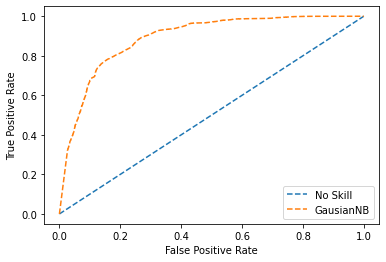

In [37]:
binary_roc_plotter(X_test,y_test,Gnb,'GausianNB')

In [38]:
roc_auc_score(y_test, Gnb.predict_proba(X_test)[:, 1])

0.8893646021570673

In [39]:
from sklearn.metrics import confusion_matrix
CM_GaussNB_binary = confusion_matrix(y_test,predict_gnb)
print('Confusion Matrix: GaussNB_Multiclass \n',CM_GaussNB_binary)

Confusion Matrix: GaussNB_Multiclass 
 [[16570  2030]
 [10207 22728]]


In [40]:
predict_RF = RF.predict(X_test)
RF.score(X_test,y_test)

0.9513534491122538

In [41]:
print("Classification Report: Random Forest \n", classification_report(y_test, predict_RF,digits=5))

Classification Report: Random Forest 
               precision    recall  f1-score   support

           0    0.93110   0.93435   0.93273     18600
           1    0.96285   0.96095   0.96190     32935

    accuracy                        0.95135     51535
   macro avg    0.94698   0.94765   0.94731     51535
weighted avg    0.95139   0.95135   0.95137     51535



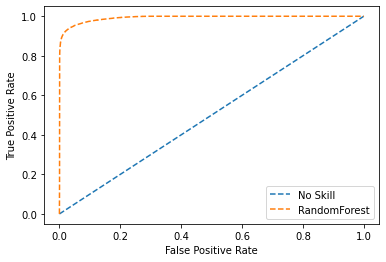

In [42]:
binary_roc_plotter(X_test,y_test,RF,'RandomForest')

In [43]:
roc_auc_score(y_test, RF.predict_proba(X_test)[:, 1])

0.9922660453712183

In [44]:
from sklearn.metrics import confusion_matrix
CM_RF_binary = confusion_matrix(y_test,predict_RF)
print('Confusion Matrix: Random Forest binary \n',CM_RF_binary)

Confusion Matrix: Random Forest binary 
 [[17379  1221]
 [ 1286 31649]]


In [45]:
predict_lr = Lr.predict(X_test)
Lr.score(X_test,y_test)

0.8687105850392937

In [46]:
print("Classification Report: Logistic Regression \n", classification_report(y_test, predict_lr,digits=5))

Classification Report: Logistic Regression 
               precision    recall  f1-score   support

           0    0.89861   0.71715   0.79769     18600
           1    0.85661   0.95430   0.90282     32935

    accuracy                        0.86871     51535
   macro avg    0.87761   0.83573   0.85026     51535
weighted avg    0.87177   0.86871   0.86488     51535



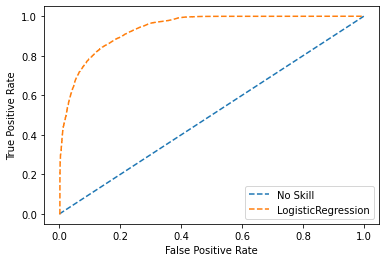

In [47]:
binary_roc_plotter(X_test,y_test,Lr,'LogisticRegression')

In [48]:
roc_auc_score(y_test, Lr.predict_proba(X_test)[:, 1])

0.9371656537559319

In [49]:
from sklearn.metrics import confusion_matrix
CM_LR_binary = confusion_matrix(y_test,predict_lr)
print('Confusion Matrix: Logistic Regression binary \n',CM_LR_binary)

Confusion Matrix: Logistic Regression binary 
 [[13339  5261]
 [ 1505 31430]]


In [50]:
predict_knn = Knn.predict(X_test)
Knn.score(X_test,y_test)

0.9378480644222373

In [54]:
print("Classification Report: KNN \n", classification_report(y_test, predict_knn,digits=5))

Classification Report: KNN 
               precision    recall  f1-score   support

           0    0.91026   0.91833   0.91428     18600
           1    0.95365   0.94887   0.95125     32935

    accuracy                        0.93785     51535
   macro avg    0.93195   0.93360   0.93276     51535
weighted avg    0.93799   0.93785   0.93791     51535



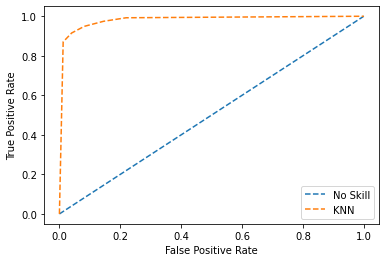

In [55]:
binary_roc_plotter(X_test,y_test,Knn,'KNN')

In [56]:
roc_auc_score(y_test, Knn.predict_proba(X_test)[:, 1])

0.9805784324288146

In [61]:
from sklearn.metrics import confusion_matrix
CM_knn_binary = confusion_matrix(y_test,predict_knn)
print('Confusion Matrix: KNN binary \n',CM_knn_binary)

Confusion Matrix: KNN binary 
 [[17081  1519]
 [ 1684 31251]]


In [65]:
predict_dt = Dt.predict(X_test)
Dt.score(X_test,y_test)

0.9394392160667507

In [66]:
print("Classification Report: Decision Tree \n", classification_report(y_test, predict_dt,digits=5))

Classification Report: Decision Tree 
               precision    recall  f1-score   support

           0    0.90796   0.92608   0.91693     18600
           1    0.95778   0.94699   0.95235     32935

    accuracy                        0.93944     51535
   macro avg    0.93287   0.93653   0.93464     51535
weighted avg    0.93980   0.93944   0.93957     51535



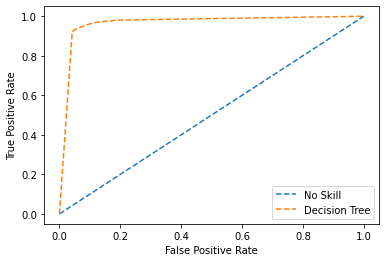

In [67]:
binary_roc_plotter(X_test,y_test,Dt,'Decision Tree')

In [68]:
roc_auc_score(y_test, Dt.predict_proba(X_test)[:, 1])

0.9637674761790493

In [69]:
from sklearn.metrics import confusion_matrix
CM_dt_binary = confusion_matrix(y_test,predict_dt)
print('Confusion Matrix: Decision Tree binary \n',CM_dt_binary)

Confusion Matrix: Decision Tree binary 
 [[17225  1375]
 [ 1746 31189]]


In [70]:
predict_ada = Ada.predict(X_test)
Ada.score(X_test,y_test)

0.91283593674202

In [71]:
print("Classification Report: Adaboost \n", classification_report(y_test, predict_ada,digits=5))

Classification Report: Adaboost 
               precision    recall  f1-score   support

           0    0.87158   0.88957   0.88048     18600
           1    0.93690   0.92598   0.93141     32935

    accuracy                        0.91284     51535
   macro avg    0.90424   0.90777   0.90594     51535
weighted avg    0.91332   0.91284   0.91303     51535



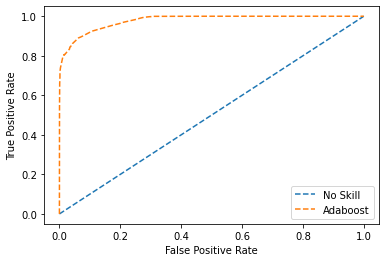

In [72]:
binary_roc_plotter(X_test,y_test,Ada,'Adaboost')

In [73]:
roc_auc_score(y_test, Ada.predict_proba(X_test)[:, 1])

0.9781584246258923

In [74]:
from sklearn.metrics import confusion_matrix
CM_ada_binary = confusion_matrix(y_test,predict_ada)
print('Confusion Matrix: Adaboost binary \n',CM_ada_binary)

Confusion Matrix: Adaboost binary 
 [[16546  2054]
 [ 2438 30497]]


In [89]:
predict_gradboost = gradboost.predict(X_test)
gradboost.score(X_test,y_test)

0.8903463665470069

In [90]:
print("Classification Report: GradientBoost \n", classification_report(y_test, predict_gradboost,digits=5))

Classification Report: GradientBoost 
               precision    recall  f1-score   support

           0    0.81696   0.89720   0.85520     18600
           1    0.93854   0.88647   0.91176     32935

    accuracy                        0.89035     51535
   macro avg    0.87775   0.89184   0.88348     51535
weighted avg    0.89466   0.89035   0.89135     51535



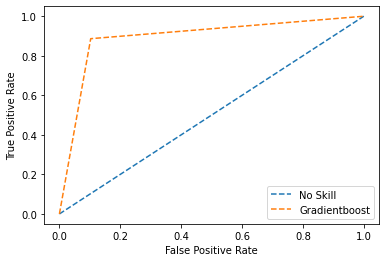

In [91]:
binary_roc_plotter(X_test,y_test,gradboost,'Gradientboost')

In [92]:
roc_auc_score(y_test, gradboost.predict_proba(X_test)[:, 1])

0.8918388288433882

In [93]:
from sklearn.metrics import confusion_matrix
CM_gradboost_binary = confusion_matrix(y_test,predict_gradboost)
print('Confusion Matrix: Gradientboost binary \n',CM_gradboost_binary)

Confusion Matrix: Gradientboost binary 
 [[16688  1912]
 [ 3739 29196]]


In [81]:
predict_extree = Ex_tree.predict(X_test)
Ex_tree.score(X_test,y_test)

0.948733870185311

In [82]:
print("Classification Report: EXTRA tree  \n", classification_report(y_test, predict_extree,digits=5))

Classification Report: EXTRA tree  
               precision    recall  f1-score   support

           0    0.92723   0.93102   0.92912     18600
           1    0.96095   0.95874   0.95984     32935

    accuracy                        0.94873     51535
   macro avg    0.94409   0.94488   0.94448     51535
weighted avg    0.94878   0.94873   0.94876     51535



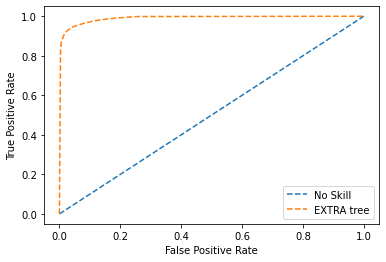

In [83]:
binary_roc_plotter(X_test,y_test,Ex_tree,'EXTRA tree')

In [84]:
roc_auc_score(y_test, Ex_tree.predict_proba(X_test)[:, 1])

0.9899809938441799

In [85]:
from sklearn.metrics import confusion_matrix
CM_Ex_tree_binary = confusion_matrix(y_test,predict_extree)
print('Confusion Matrix: EXTRA tree binary \n',CM_Ex_tree_binary)

Confusion Matrix: EXTRA tree binary 
 [[17317  1283]
 [ 1359 31576]]


In [18]:
predict_xg = Xg.predict(X_test)
Xg.score(X_test,y_test)

0.9469874842340157

In [22]:
print("Classification Report: \n", classification_report(y_test, predict_xg,digits=5))

Classification Report: 
               precision    recall  f1-score   support

           0    0.91903   0.93554   0.92721     18600
           1    0.96322   0.95345   0.95831     32935

    accuracy                        0.94699     51535
   macro avg    0.94113   0.94450   0.94276     51535
weighted avg    0.94727   0.94699   0.94709     51535



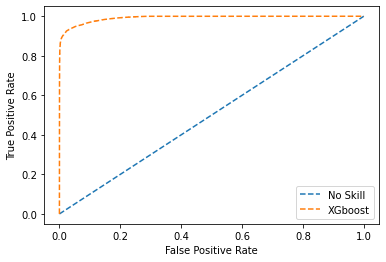

In [23]:
binary_roc_plotter(X_test,y_test,Xg,'XGboost')

In [24]:
roc_auc_score(y_test, Xg.predict_proba(X_test)[:, 1])

0.9916384316779058

In [25]:
from sklearn.metrics import confusion_matrix
CM_xgb_binary = confusion_matrix(y_test,predict_xg)
print('Confusion Matrix: XGboost binary \n',CM_xgb_binary)

Confusion Matrix: XGboost binary 
 [[17401  1199]
 [ 1533 31402]]
